# Projeto do Curso de Python para Análise de dados
## Projeto 03 - Case de Finanças

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

SyntaxError: invalid syntax (Temp/ipykernel_22036/1933798735.py, line 6)

In [50]:
pip install jupyter-dash

In [ ]:
import plotly.graph_objects as go

In [2]:
dados = pd.read_excel('Vase_004 - Magalu - Sem Resolução.xlsx')
dados.head()

,Data,Maior,Menor,Abertura,Fechamento,Volume,Adj Close
0,2021-01-04,25.580000,24.870001,25.260000,25.200001,25706100,25.181740
1,2021-01-05,25.180000,24.340000,25.100000,24.760000,25431900,24.742058
2,2021-01-06,24.660000,23.420000,24.650000,23.459999,51799000,23.442999
3,2021-01-07,23.850000,22.950001,23.639999,23.160000,42146600,23.143217
4,2021-01-08,24.299999,23.020000,23.190001,23.840000,43988100,23.822723


In [6]:
# Verificando o tamanho da base
dados.shape

(247, 7)

In [7]:
# Verificando se há algum dado nulo
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Data        247 non-null    datetime64[ns]
 1   Maior       247 non-null    float64       
 2   Menor       247 non-null    float64       
 3   Abertura    247 non-null    float64       
 4   Fechamento  247 non-null    float64       
 5   Volume      247 non-null    int64         
 6   Adj Close   247 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.6 KB


In [9]:
dados.describe().round(2)

,Maior,Menor,Abertura,Fechamento,Volume,Adj Close
count,247.00,247.00,247.00,247.00,2.470000e+02,247.00
mean,18.98,18.21,18.63,18.55,4.536056e+07,18.54
std,5.63,5.57,5.60,5.64,4.082594e+07,5.63
min,6.20,5.62,5.71,5.74,8.716100e+06,5.74
25%,15.01,14.28,14.71,14.56,2.285200e+07,14.56
50%,20.65,19.93,20.28,20.27,3.130900e+07,20.26
75%,22.60,21.99,22.38,22.20,4.742785e+07,22.18
max,27.07,25.90,26.25,26.24,2.578313e+08,26.22


In [10]:
# Series Temporais
dados = dados.set_index('Data')
dados.head()

,Maior,Menor,Abertura,Fechamento,Volume,Adj Close
Data,,,,,,
2021-01-04,25.580000,24.870001,25.260000,25.200001,25706100,25.181740
2021-01-05,25.180000,24.340000,25.100000,24.760000,25431900,24.742058
2021-01-06,24.660000,23.420000,24.650000,23.459999,51799000,23.442999
2021-01-07,23.850000,22.950001,23.639999,23.160000,42146600,23.143217
2021-01-08,24.299999,23.020000,23.190001,23.840000,43988100,23.822723


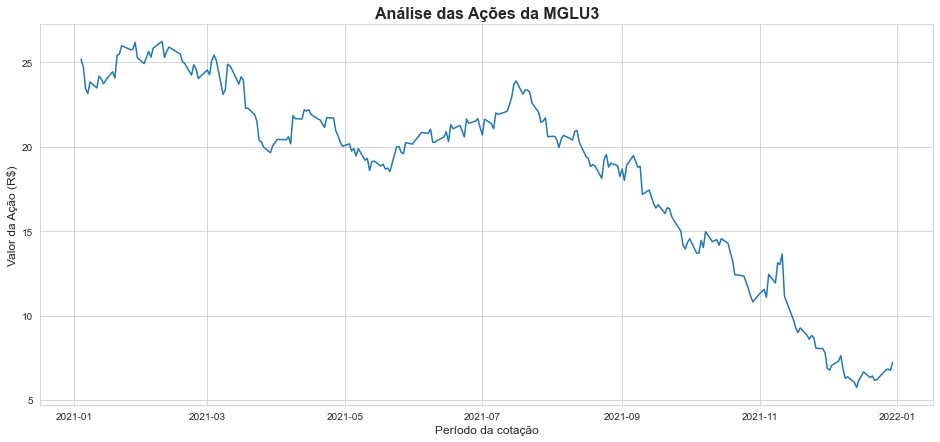

In [16]:
# Estilo do seaborn
sns.set_style('whitegrid')

plt.figure(figsize=(16,7))
plt.title('Análise das Ações da MGLU3', weight="bold", size=16, loc='center')
plt.plot(dados.index, dados['Fechamento'])

plt.xlabel('Período da cotação', size=12)
plt.ylabel('Valor da Ação (R$)', size=12)
plt.show()

In [22]:
# Fazendo uma média de 5 em 5
dados['Fechamento'].rolling(5).mean()

Data
2021-01-04       NaN
2021-01-05       NaN
2021-01-06       NaN
2021-01-07       NaN
2021-01-08    24.084
               ...  
2021-12-23     6.354
2021-12-27     6.378
2021-12-28     6.478
2021-12-29     6.546
2021-12-30     6.758
Name: Fechamento, Length: 247, dtype: float64

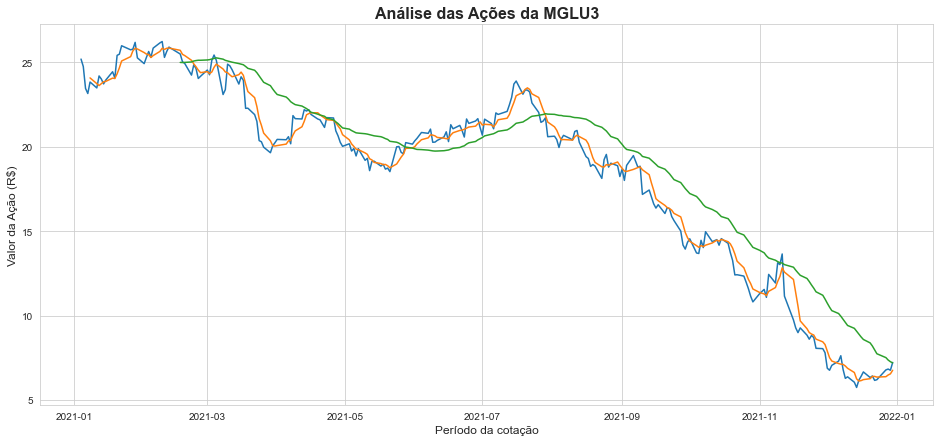

In [18]:
media_movel = dados['Fechamento'].rolling(5).mean()
media_tendencia = dados['Fechamento'].rolling(30).mean()

# Estilo do seaborn
sns.set_style('whitegrid')

plt.figure(figsize=(16,7))
plt.title('Análise das Ações da MGLU3', weight="bold", size=16, loc='center')
plt.plot(dados.index, dados['Fechamento'])
plt.plot(dados.index, media_movel)
plt.plot(dados.index,media_tendencia)

plt.xlabel('Período da cotação', size=12)
plt.ylabel('Valor da Ação (R$)', size=12)
plt.show()

In [33]:
# puxando a informação do Mês da coluna Data
dados['Data'] = dados.index
dados['Mes'] = dados['Data'].dt.month
dados.head()

,Maior,Menor,Abertura,Fechamento,Volume,Adj Close,Data,Mes
Data,,,,,,,,
2021-01-04,25.580000,24.870001,25.260000,25.200001,25706100,25.181740,2021-01-04,1
2021-01-05,25.180000,24.340000,25.100000,24.760000,25431900,24.742058,2021-01-05,1
2021-01-06,24.660000,23.420000,24.650000,23.459999,51799000,23.442999,2021-01-06,1
2021-01-07,23.850000,22.950001,23.639999,23.160000,42146600,23.143217,2021-01-07,1
2021-01-08,24.299999,23.020000,23.190001,23.840000,43988100,23.822723,2021-01-08,1


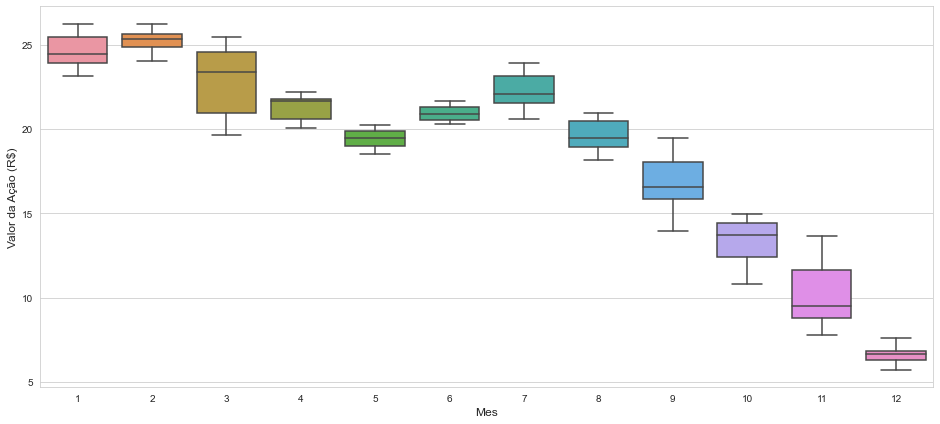

In [37]:
plt.figure(figsize=(16,7))

sns.boxplot(data = dados, x='Mes',y = 'Fechamento')

plt.xlabel('Mes', size=12)
plt.ylabel('Valor da Ação (R$)', size=12)
plt.show()

In [36]:
# Agrupando os dados por Mês
dados.groupby(['Mes']).describe()['Fechamento'].reset_index()

,Mes,count,mean,std,min,25%,50%,75%,max
0,1,19.0,24.644737,0.960280,23.160000,23.900000,24.450001,25.455000,26.190001
1,2,18.0,25.208889,0.656021,24.049999,24.877501,25.299999,25.650000,26.240000
2,3,23.0,22.855217,1.976698,19.650000,20.940001,23.389999,24.559999,25.440001
3,4,20.0,21.249000,0.735297,20.030001,20.560000,21.625000,21.760000,22.200001
4,5,21.0,19.430476,0.564973,18.530001,18.969999,19.459999,19.900000,20.250000
5,6,21.0,20.898095,0.463116,20.270000,20.500000,20.889999,21.270000,21.670000
6,7,21.0,22.232857,0.977574,20.600000,21.530001,22.040001,23.120001,23.900000
7,8,22.0,19.656818,0.885827,18.129999,18.897500,19.485000,20.452499,20.969999
8,9,21.0,16.746191,1.628581,13.940000,15.870000,16.570000,18.010000,19.480000
9,10,20.0,13.350000,1.267667,10.810000,12.392500,13.720000,14.400000,14.970000


In [48]:
Grafico = go.Figure(
    data=[
          go.Candlestick(
              x= dados.index,
              open = dados['Abertura'],
              high = dados['Maior'],
              low = dados['Menor'],
              close = dados['Fechamento'],
          )
    ]
)

#Grafico.update_layout( xaxis_rangeslider_visible=False )

Grafico.show()